<a href="https://colab.research.google.com/github/Pietrosittoni/Binarized_neuralnet/blob/main/BNN_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binarized Neural Network - Knowledge and Data Mining project**

### Authors: Pietro Sittoni, Irene Caria

Binarized neural networks are nets in which both the weights and activations are
binary. In this project we will show how to fit a binary neural network
using SAT. The work is structured as following:

1.   Define different binary functions $ f: \left\{-1,1\right\}^n → \left\{-1,1\right\} $ to create different datasets $ \left\{x^{(i)},f(x^{(i)})\right\}$ for $i=1, ..., m$ and divide them in training and test sets;

2.   Encode the training of two different binarized neural network in MaxSat: one without hidden layer and one with an hidden layer of variable dimension;

3.   Evaluate the networks on different:
    *   datasets in dimension and binary functions
    *   number of neurons






## Libraries

In [ ]:
pip install python-sat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.2 MB/s eta 0:00:00


In [ ]:
!pip3 install keras
!pip3 install ann_visualizer
!pip install graphviz

from keras.models import Sequential  
from keras.layers import Dense  
from ann_visualizer.visualize import ann_viz 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=a1af6ce4bf38ef7689e641eb26d512b32a0e5a2f71cf669821648514d35cd520
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann_visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pysat.examples.rc2 import RC2
from pysat.formula import WCNF
from pysat.formula import WCNFPlus
from sklearn.model_selection import train_test_split
import itertools
import math 
import numpy as np
import matplotlib.pyplot as plt

## Binary functions $ f: \left\{-1,1\right\}^n → \left\{-1,1\right\} $

We decided to try different binary functions $ f: \left\{-1,1\right\}^n → \left\{-1,1\right\} $, in order to see how our binarized neural networks perfom using 0 or 1 hidden layer. The following function ``` binary_function ``` defines $4$ different functions:

*   ```XOR```: it is the generalized form of the XOR function. It will produce $1$ if there are an odd number of $1$ among the inputs, $-1$ otherwise;

*   ```parity```: it is similar to the ```XOR``` but it will produce $1$ if there are an *even* number of $1$ among the inputs, $-1$ otherwise;

*   ```inner_product```: it is the product of the input elements;

*   ```majority```: it assign $1$ if the majority of the input elements are ones, $-1$ otherwise.

In [ ]:
def binary_function(x, f_name):
  '''
  Input:
  - x: np.array of size n
  - f_name: string of the name function

  Output:
  - y: a value in {-1,1}
  '''

  # XOR funtion
  if f_name == 'XOR':
    y = -np.prod(-x)
    return y

  # Parity function
  if f_name == 'parity': 
    y =  np.prod(-x)
    return y

  # Inner product
  if f_name == 'inner_product':
    y = np.prod(x)
    return y

  # Majority function
  if f_name == 'majority':
    return 1 if np.sum(x)>=0 else -1

  # Random function
  if f_name == 'random':
    return np.random.choice([-1,1])
    

## Dataset

The function ```dataset_label``` creates a dataset $ \left\{x^{(i)},f(x^{(i)})\right\}$ for $i=1, ..., m$, where each $x^{(i)} = (x_1^{(i)}, ..., x_n^{(i)}) \in \left\{-1,1\right\}^n$ are randomly generated and $f(x^{(i)}) \in \left\{-1,1\right\}$.

In [ ]:
def dataset_label(m, n, f_name):
  '''
  Input:
  - m: number of samples
  - n: dimension of samples
  - f_name: name of the binary function

  Output:
  - dataset
  - label
  '''
  np.random.seed(6)
  dataset = np.array([list(2*np.random.randint(0,2,size=n)-1) for i in range(m)])
  label = np.array([binary_function(dataset[i], f_name) for i in range(m)])

  return dataset, label

In [ ]:
# This is an example of dataset

X,y = dataset_label(50,5,'majority')
print(f'This is the dataset X: \n {X} \n')
print(f'This is the label y generated by the binary function chosen: \n {y} \n')

This is the dataset X: 
 [[-1  1  1 -1 -1]
 [ 1  1 -1 -1 -1]
 [ 1  1  1  1  1]
 [-1  1  1 -1 -1]
 [-1  1 -1 -1 -1]
 [-1  1  1 -1  1]
 [ 1 -1  1  1 -1]
 [-1  1  1  1  1]
 [-1  1 -1 -1 -1]
 [ 1 -1  1  1  1]
 [-1 -1  1  1  1]
 [-1 -1 -1  1 -1]
 [ 1 -1 -1 -1  1]
 [-1  1  1  1  1]
 [-1  1 -1  1  1]
 [ 1 -1 -1 -1  1]
 [ 1 -1  1 -1  1]
 [-1 -1 -1  1  1]
 [ 1  1  1  1  1]
 [-1  1  1 -1 -1]
 [ 1 -1 -1  1  1]
 [ 1  1 -1 -1  1]
 [ 1 -1 -1 -1  1]
 [ 1 -1  1 -1  1]
 [ 1 -1  1 -1 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1  1  1 -1]
 [-1 -1  1  1 -1]
 [ 1 -1 -1  1 -1]
 [-1 -1 -1  1  1]
 [-1 -1  1 -1  1]
 [ 1  1  1 -1 -1]
 [-1  1 -1  1  1]
 [-1 -1 -1 -1  1]
 [-1 -1  1  1 -1]
 [ 1 -1 -1 -1 -1]
 [ 1 -1 -1  1  1]
 [ 1  1 -1  1 -1]
 [ 1  1  1 -1 -1]
 [ 1  1  1  1  1]
 [ 1  1 -1  1  1]
 [ 1 -1  1  1  1]
 [-1 -1  1 -1  1]
 [ 1  1 -1  1  1]
 [ 1  1 -1 -1  1]
 [-1 -1  1  1  1]
 [-1 -1 -1 -1  1]
 [-1  1 -1 -1 -1]
 [ 1 -1  1 -1 -1]
 [ 1 -1  1 -1  1]] 

This is the label y generated by the binary function chosen: 
 [-1 -1  1

## Binarized Neural Network - without hidden layer

In this section we will implement the BNN with only the input layer

In [ ]:
def clasue_1layer(X,y):
  """
  Input one vector X of size n and one response y,observation, and the list of wcnf
  Output clause related to one observation 
  """
  m,n = X.shape
  wcnf = WCNF()
  for obs in range(1,m+1):
    w = X[obs-1,:]*np.array([i for i in range(1,n+1)])
    
    r = n - math.ceil(n/2)+1
    r_hard = math.ceil(n/2)
    w_hard = -w
    for i in itertools.combinations(w, r):
      temp = [int(j) for j in i]
      wcnf.append(temp+[int(-n-obs)])
      del temp
    for i in itertools.combinations(w_hard, r_hard):
      temp = [int(j) for j in i]
      wcnf.append(temp+[int(n+obs)])
      del temp
   
    if y[obs-1]==1:
      wcnf.append([n+obs],weight=1)
    else:
      wcnf.append([-n-obs],weight=1)
  rc2 = RC2(wcnf)
  return rc2

In [ ]:
def evaluate1layer(x,w,y):
  '''
  Input:
  - x: test features
  - w: trained weights of the bnn with 1 layer
  - y: test label

  Output:
  - accuracy on the test set
  '''
  m,n = x.shape
  output = []
  r = math.ceil(n/2)
  for obs in range(m):
    flag = False
    w_singed = np.sign(np.array(w))*x[obs,:]
    for i in itertools.combinations(w_singed, r):
      temp = [int(j) for j in i]
      if sum(temp)==r:
        flag = True
        output.append(1)
        break 
    if not flag:
      output.append(-1)

  output = np.array(output)
  return sum(y==output)/x.shape[0]

## Binarized Neural Network - with $1$ hidden layer

The following functions are the ones encoding the BNN with $1$ hidden layer

In [ ]:
def product_cart(w,h):
  temp = []
  for i in range(len(w)):
    temp.append([str(-h[i])+","+str(w[i]),str(h[i])+","+str(-w[i])])
  L = [list(i) for i in list(itertools.product(*temp))]
  temp = []
  for j in L:
    k = [i.split(",") for i in j]
    k = [int(i) for i in list(itertools.chain(*k))]
    temp.append(k)

  return temp

In [ ]:
def product_cart_not(w,h):
  temp = []
  for i in range(len(w)):
    temp.append([str(-h[i])+","+str(-w[i]),str(h[i])+","+str(w[i])])
  L = [list(i) for i in list(itertools.product(*temp))]
  temp = []
  for j in L:
    k = [i.split(",") for i in j]
    k = [int(i) for i in list(itertools.chain(*k))]
    temp.append(k)

  return temp

In [ ]:
def clasue_2layer(X,y,hidden_dim):
  """
  Input one vector X of size n and one response y,observation, and the list of wcnf
  Output clause related to one observation 
  """
  # First step build the variable
  # We store h and w1 as a matrix structure 
  m,n = X.shape
  wcnf = WCNF()
  w1 = [] # hidden_dim x n
  for i in range(hidden_dim):
    w1.append([j+1 for j in range(i*n,(i+1)*n)])
  h_layer =[] #obs x hiddem_dim 
  w2 = [i for i in range(n*hidden_dim+1,(n+1)*(hidden_dim)+1)] # hidden_dim
  start_h = (n+1)*(hidden_dim)+1
  for i in range(m):
    h_layer.append([j for j in range(start_h+i*hidden_dim,start_h+(i+1)*hidden_dim)])
  start_o = (n+1+m)*(hidden_dim)+1
  o = [i for i in range(start_o,start_o+m)]  
  # start encoding the problem
  for obs in range(1,m+1):
    for h in range(1,hidden_dim+1):
        w1_sign = X[obs-1,:]*np.array(w1[h-1])
        w1_sign_negated = -w1_sign
        r_plain = n - math.ceil(n/2)+1 
        r_negated = math.ceil(n/2)
        for i in itertools.combinations(w1_sign, r_plain):
          temp = [int(j) for j in i] 
          temp.append(-h_layer[obs-1][h-1])
          wcnf.append(temp)
          del temp
        for i in itertools.combinations(w1_sign_negated, r_negated):
          temp = [int(j) for j in i] 
          temp.append(h_layer[obs-1][h-1])
          wcnf.append(temp)
          del temp
    index = [i for i in range(hidden_dim)]
    r_plain = hidden_dim - math.ceil(hidden_dim/2)+1 
    r_negated = math.ceil(hidden_dim/2)
    w2 = np.array(w2)
    h_layer_temp = np.array(h_layer[obs-1])
    for i in itertools.combinations(index, r_plain):
      i = list(i)
      temp = product_cart(w2[i],h_layer_temp[i])
      for k in temp:
        k.append(-o[obs-1])
        wcnf.append(k)
    for i in itertools.combinations(index, r_negated):
      i = list(i)
      temp = product_cart_not(w2[i],h_layer_temp[i])
      for k in temp:
        k.append(o[obs-1])
        wcnf.append(k)
    if y[obs-1]==1: 
      wcnf.append([o[obs-1]],weight=1) 
    else: 
      wcnf.append([-o[obs-1]],weight=1) 
  rc2 = RC2(wcnf) 
  return rc2

In [ ]:
def evaluate2layer(x,w,y,hidden_dim):
  '''
  Input:
  - x: test features
  - w: first (n+1)*hidden_dim of the trained model with 1 hidden layer
  - y: test label

  Output:
  - accuracy on the test set
  '''
  m,n = x.shape
  w1_ = np.sign(w[:hidden_dim*n])
  w2 = np.sign(w[hidden_dim*n:])
  w1 = []
  r = math.ceil(n/2)
  r_h = math.ceil(hidden_dim/2)
  output = []
  for i in range(hidden_dim):
    w1.append([w1_[j] for j in range(i*n,(i+1)*n)])
  w1 = np.array(w1)
  for obs in range(m):
    h = np.sign(w1@x[obs,:])
    h[h==0]=1
    output.append(np.sign(w2@h))
  output = np.array(output)
  output[output==0]=1
  return sum(y==output)/len(y)

## Visualizing Neural Networks

In this section we created a function, ```visual_nn```, in order to visualize the networks we build using the ```ann_visualizer``` library.

In [ ]:
def visual_nn(input_dim, num_hidden, hidden_dim, file_name):
  '''
  Input:
  - input_dim: number of samples
  - num_hidden: number of hidden layers (0 or 1)
  - hidden_dim: number of neurons of the hidden layer
  - file_name: name of the pdf of the network image

  Output:
  - the ann_visualization of the network
  '''

  # Only input layer (0 hidden layer)
  if num_hidden==0:
    model = Sequential()
    model.add(Dense(1, input_dim=input_dim))
    return ann_viz(model, view=True, title=f"Binarized Neural Network with input layer of {input_dim} neurons and 0 hidden layer", 
                   filename=file_name)

  # 1 hidden layer
  else:
    model = Sequential()
    model.add(Dense(hidden_dim, input_dim=input_dim))
    model.add(Dense(1))
    return ann_viz(model, view=True, title=f"Binarized Neural Network with input layer of {input_dim} neurons and 1 hidden layer of {hidden_dim} neurons", 
                   filename=file_name)

In [ ]:
# Example of network without hidden layer
visual_nn(10, 0, 0, 'nn_1layer')

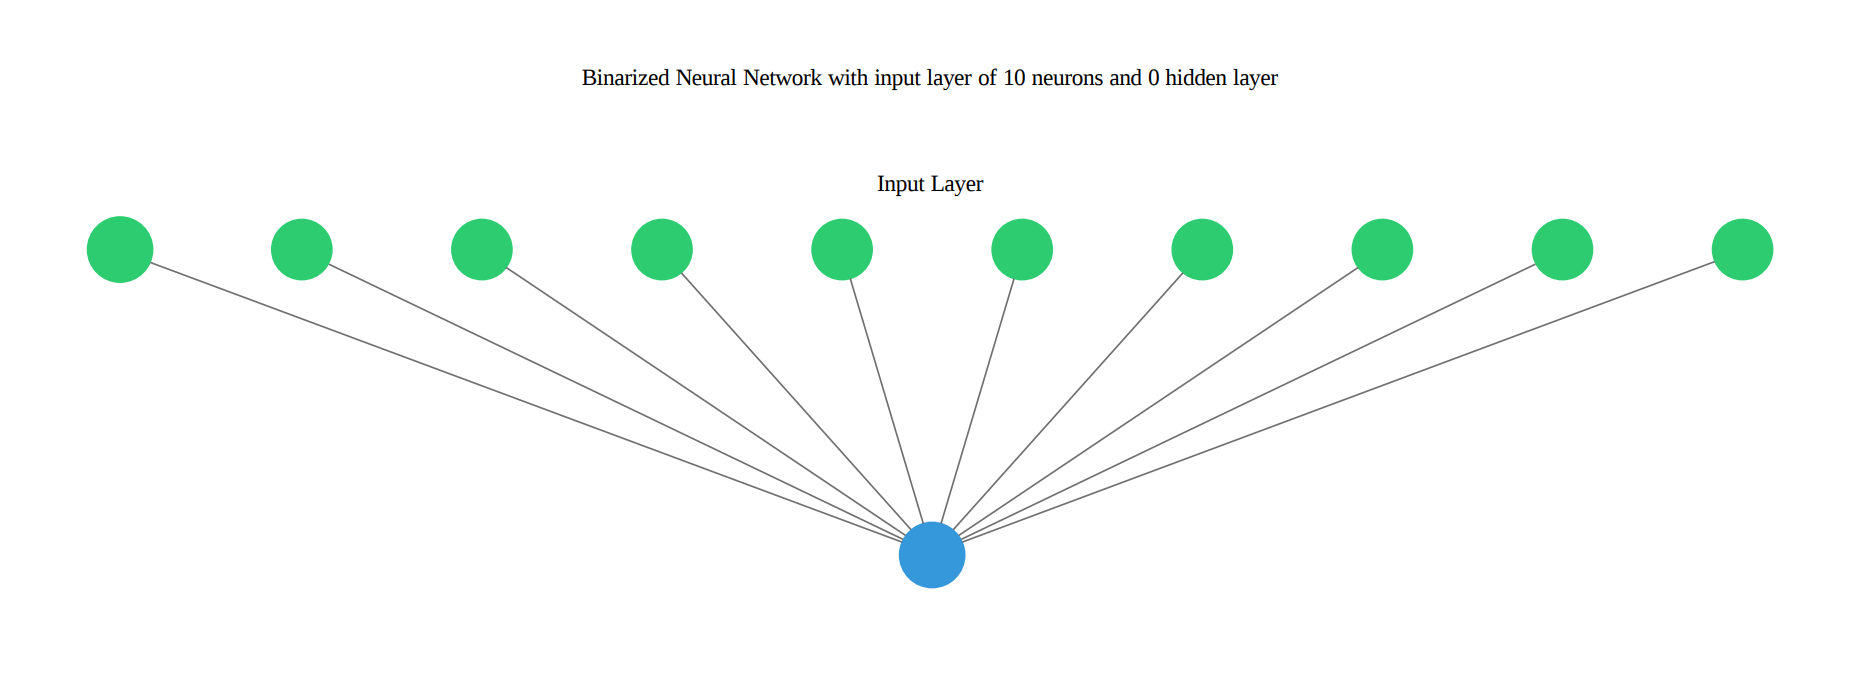

In [ ]:
# Example of network with 1 hidden layer
visual_nn(10, 1, 5, 'nn_2layer')

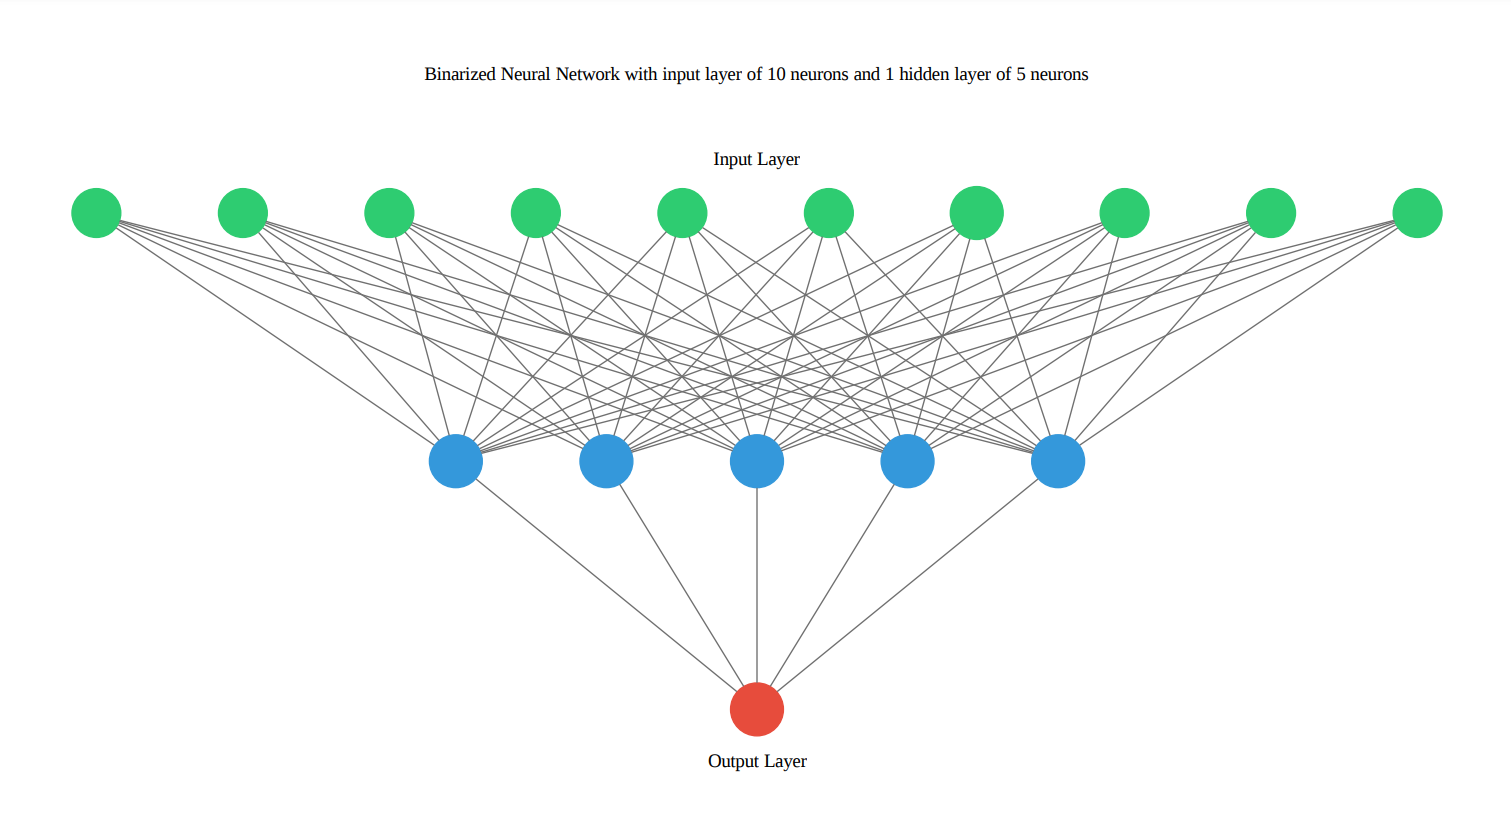

## Results

The function ```final_results``` display and plot the main phases of our work:

1.  First, it creates a dataset with the choosen dimension;

2.  It splits the dataset in train and test sets;

3.  It plots a pie chart in order to see if the training set is balanced or not;

4.  It fits the binarized neural network selected: with $1$ or $2$ layers, specifying also the number of neurons we want to use;

5.  It calculates the accuracy on the training set;

6.  It evaluates the network on the test set.

In [ ]:
def final_results(m, n, f_name, test_size, num_layer, hidden_dim=0):
  '''
  Input:
  - m: number of samples
  - n: dimension of the samples
  - f_name: name of the function choosen
  - test_size: size of the test set
  - num_layer: number of layers (1 or 2)
  - hidden_dim: number of neurons of the hidden layer

  Output:
  - Train and test dimension
  - Pie chart to see if the data are balanced or not
  - Fit and evaluation of the network selected
  '''

  # Dataset creation
  X,y = dataset_label(m,n,f_name)

  # Train and test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
  print(f'Training: \n X_train dimension= {X_train.shape} \n y_train dimension={y_train.shape}\n')
  print(f'Test: \n X_test dimension= {X_test.shape} \n y_test dimension={y_test.shape}\n \n')

  # Balance or unbalanced?
  print('Are the data balanced? \n')  
  fig, ax = plt.subplots()
  ax.pie([len(y_train[y_train==1])/len(y_train), len(y_train[y_train==-1])/len(y_train)], explode=(0.1, 0), labels= ['Class 1', 'Class -1'], 
         autopct='%1.1f%%', shadow=True, startangle=90, colors = ['#9a031e', '#fb8b24'])
  plt.show()

  # Fit and evaluation
  if num_layer==1:
    print(f'Binarized Neural Network with only input layer \n')
    model = clasue_1layer(X_train,y_train).compute()
    print(f'The trained model : {model}')
    w = model[:n]
    print(f'This are the weights: {w} \n \n')

    # Accuracy on train set
    acc = len([1 for i in range(len(model[n:])) if np.sign(model[n:][i])==y_train[i]])/len(y_train)
    print(f"The accuracy on the training set is: {acc} ")
    print(f"The number of error is {int((1-acc)*len(y_train))} \n \n") 

    # Evaluation on test set
    test_results = evaluate1layer(X_test,w,y_test)
    print(f'The accuracy on the test set is: {test_results}')
  
  else:
    print(f'Binarized Neural Network with 1 hidden layers of dimension {hidden_dim} \n')
    model = clasue_2layer(X_train,y_train,hidden_dim=hidden_dim).compute()
    print(f'The trained model : {model}')
    w = model[:(n+1)*hidden_dim]
    print(f'This are the weights: {w} \n \n')

    # Accuracy on train set
    acc = len([1 for i in range(len(model[-X_train.shape[0]:])) if np.sign(model[-X_train.shape[0]:][i])==y_train[i]])/len(y_train)
    print(f"The accuracy on the training set is: {acc} ")
    print(f"The number of error is {int((1-acc)*len(y_train))} \n \n")

    # Evaluation on test set

    test_results = evaluate2layer(X_test,model[:(n+1)*hidden_dim],y_test, hidden_dim=hidden_dim)
    print(f'The accuracy on the test set is: {test_results}')


Training: 
 X_train dimension= (22, 5) 
 y_train dimension=(22,)

Test: 
 X_test dimension= (10, 5) 
 y_test dimension=(10,)
 

Are the data balanced? 



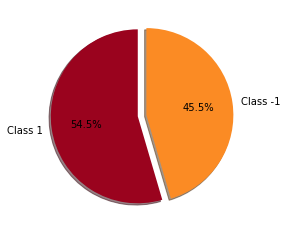

Binarized Neural Network with only input layer 

The trained model : [1, 2, -3, 4, -5, -6, 7, 8, -9, 10, -11, 12, -13, 14, -15, -16, 17, -18, -19, 20, -21, -22, -23, 24, -25, 26, 27]
This are the weights: [1, 2, -3, 4, -5] 
 

The accuracy on the training set is: 0.8181818181818182 
The number of error is 3 
 

The accuracy on the test set is: 0.8


In [ ]:
# Example of binarized nn with only input layer 
final_results(2**5,5,'XOR',0.3, 1)

Training: 
 X_train dimension= (5, 3) 
 y_train dimension=(5,)

Test: 
 X_test dimension= (3, 3) 
 y_test dimension=(3,)
 

Are the data balanced? 



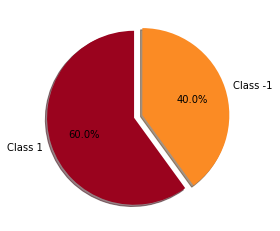

Binarized Neural Network with 1 hidden layers of dimension 3 

The trained model : [-1, 2, -3, 4, -5, -6, 7, -8, -9, -10, 11, -12, 13, -14, -15, -16, -17, -18, -19, 20, 21, 22, -23, -24, -25, -26, -27, -28, 29, 30, -31, 32]
This are the weights: [-1, 2, -3, 4, -5, -6, 7, -8, -9, -10, 11, -12] 
 

The accuracy on the training set is: 1.0 
The number of error is 0 
 

The accuracy on the test set is: 1.0


In [ ]:
# Example of binarized nn with 1 hidden layer
final_results(2**3,3,'XOR',0.3, 2, 3)

## Some tests

### Majority function

Training: 
 X_train dimension= (22, 5) 
 y_train dimension=(22,)

Test: 
 X_test dimension= (10, 5) 
 y_test dimension=(10,)
 

Are the data balanced? 



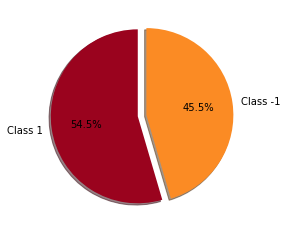

Binarized Neural Network with only input layer 

The trained model : [1, 2, 3, 4, 5, -6, -7, 8, -9, -10, 11, 12, 13, -14, 15, 16, -17, -18, 19, 20, -21, 22, -23, 24, -25, 26, 27]
This are the weights: [1, 2, 3, 4, 5] 
 

The accuracy on the training set is: 1.0 
The number of error is 0 
 

The accuracy on the test set is: 1.0


In [ ]:
# 1 layer
final_results(2**5,5,'majority',0.3, 1)

Training: 
 X_train dimension= (22, 5) 
 y_train dimension=(22,)

Test: 
 X_test dimension= (10, 5) 
 y_test dimension=(10,)
 

Are the data balanced? 



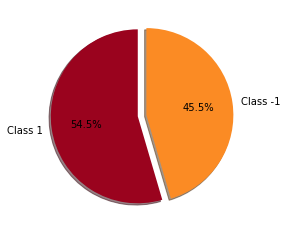

Binarized Neural Network with 1 hidden layers of dimension 5 

The trained model : [-1, -2, -3, -4, -5, -6, 7, 8, 9, 10, 11, -12, 13, -14, -15, 16, -17, 18, -19, -20, -21, 22, 23, 24, 25, -26, 27, 28, -29, -30, 31, 32, 33, 34, 35, 36, -37, 38, 39, -40, -41, 42, -43, -44, 45, 46, 47, 48, 49, 50, 51, -52, -53, -54, -55, -56, 57, -58, -59, 60, -61, -62, 63, 64, -65, -66, 67, -68, -69, 70, 71, -72, -73, -74, -75, -76, 77, 78, 79, 80, -81, 82, -83, -84, 85, 86, -87, -88, -89, -90, 91, -92, 93, 94, -95, -96, 97, -98, -99, 100, -101, 102, -103, -104, 105, 106, -107, 108, 109, -110, -111, -112, 113, 114, -115, 116, 117, -118, -119, 120, -121, 122, -123, -124, 125, 126, 127, 128, 129, 130, -131, -132, -133, -134, -135, -136, -137, -138, -139, -140, -141, -142, 143, -144, -145, 146, 147, 148, -149, 150, 151, -152, -153, 154, 155, -156, 157, -158, 159, -160, 161, 162]
This are the weights: [-1, -2, -3, -4, -5, -6, 7, 8, 9, 10, 11, -12, 13, -14, -15, 16, -17, 18, -19, -20, -21, 22, 23, 24, 25, -26

In [ ]:
# 2 layer
final_results(2**5,5,'majority',0.3, 2, 5)

### XOR function

Training: 
 X_train dimension= (22, 5) 
 y_train dimension=(22,)

Test: 
 X_test dimension= (10, 5) 
 y_test dimension=(10,)
 

Are the data balanced? 



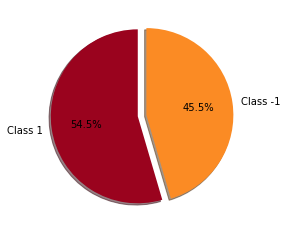

Binarized Neural Network with only input layer 

The trained model : [1, 2, -3, 4, -5, -6, 7, 8, -9, 10, -11, 12, -13, 14, -15, -16, 17, -18, -19, 20, -21, -22, -23, 24, -25, 26, 27]
This are the weights: [1, 2, -3, 4, -5] 
 

The accuracy on the training set is: 0.8181818181818182 
The number of error is 3 
 

The accuracy on the test set is: 0.8


In [ ]:
# 1 layer
final_results(2**5,5,'XOR',0.3, 1)

Training: 
 X_train dimension= (22, 5) 
 y_train dimension=(22,)

Test: 
 X_test dimension= (10, 5) 
 y_test dimension=(10,)
 

Are the data balanced? 



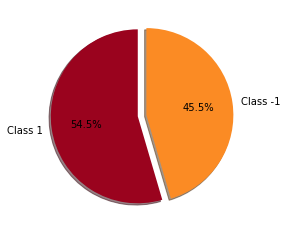

Binarized Neural Network with 1 hidden layers of dimension 5 

The trained model : [-1, -2, -3, 4, 5, -6, -7, 8, 9, 10, 11, -12, 13, 14, -15, 16, -17, 18, 19, 20, 21, 22, 23, 24, -25, -26, 27, 28, -29, -30, -31, -32, -33, -34, 35, -36, -37, -38, -39, 40, -41, 42, 43, 44, 45, -46, -47, -48, -49, 50, -51, -52, -53, -54, -55, -56, 57, -58, -59, -60, -61, 62, 63, 64, 65, 66, 67, -68, 69, 70, -71, -72, -73, -74, -75, 76, 77, 78, 79, 80, 81, 82, 83, 84, -85, 86, 87, 88, -89, -90, 91, -92, -93, 94, -95, 96, 97, -98, 99, 100, 101, 102, -103, -104, -105, 106, -107, -108, 109, -110, -111, 112, 113, 114, -115, 116, 117, -118, 119, -120, -121, 122, 123, 124, 125, -126, -127, -128, -129, 130, 131, 132, 133, 134, -135, -136, -137, -138, -139, -140, -141, -142, 143, -144, 145, 146, 147, -148, 149, -150, 151, 152, -153, -154, 155, -156, 157, -158, 159, -160, 161, 162]
This are the weights: [-1, -2, -3, 4, 5, -6, -7, 8, 9, 10, 11, -12, 13, 14, -15, 16, -17, 18, 19, 20, 21, 22, 23, 24, -25, -26, 27, 28,

In [ ]:
# 2 layer
final_results(2**5,5,'XOR',0.3, 2, 5)

### Parity function

Training: 
 X_train dimension= (22, 5) 
 y_train dimension=(22,)

Test: 
 X_test dimension= (10, 5) 
 y_test dimension=(10,)
 

Are the data balanced? 



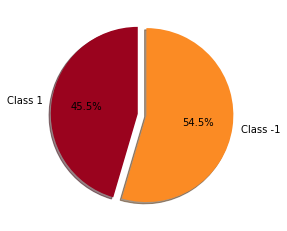

Binarized Neural Network with only input layer 

The trained model : [-1, -2, 3, -4, 5, 6, -7, -8, 9, -10, 11, -12, 13, -14, 15, 16, -17, 18, 19, -20, 21, 22, 23, -24, 25, -26, -27]
This are the weights: [-1, -2, 3, -4, 5] 
 

The accuracy on the training set is: 0.8181818181818182 
The number of error is 3 
 

The accuracy on the test set is: 0.8


In [ ]:
# 1 layer
final_results(2**5,5,'parity',0.3, 1)

Training: 
 X_train dimension= (22, 5) 
 y_train dimension=(22,)

Test: 
 X_test dimension= (10, 5) 
 y_test dimension=(10,)
 

Are the data balanced? 



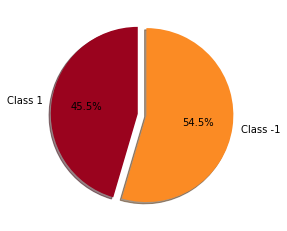

Binarized Neural Network with 1 hidden layers of dimension 5 

The trained model : [-1, -2, 3, 4, -5, -6, -7, -8, 9, -10, -11, -12, -13, 14, 15, 16, -17, 18, 19, -20, 21, -22, 23, -24, -25, 26, -27, 28, -29, 30, 31, -32, -33, -34, 35, -36, -37, -38, -39, 40, -41, -42, -43, 44, -45, 46, -47, -48, -49, 50, -51, 52, -53, -54, -55, -56, -57, -58, -59, -60, 61, 62, -63, 64, 65, 66, -67, 68, -69, -70, -71, 72, -73, -74, -75, 76, -77, 78, 79, 80, 81, 82, 83, 84, -85, 86, 87, 88, 89, -90, -91, -92, 93, -94, 95, 96, -97, 98, -99, -100, -101, 102, 103, -104, -105, -106, -107, 108, -109, 110, -111, -112, -113, 114, 115, 116, 117, 118, -119, -120, -121, -122, -123, 124, -125, 126, -127, -128, -129, 130, -131, 132, 133, 134, -135, -136, -137, -138, -139, -140, 141, 142, -143, 144, -145, -146, -147, 148, -149, 150, -151, -152, 153, 154, -155, 156, -157, 158, -159, 160, -161, -162]
This are the weights: [-1, -2, 3, 4, -5, -6, -7, -8, 9, -10, -11, -12, -13, 14, 15, 16, -17, 18, 19, -20, 21, -22, 23, -

In [ ]:
# 2 layer
final_results(2**5,5,'parity',0.3, 2, 5)

### Inner product function

Training: 
 X_train dimension= (22, 5) 
 y_train dimension=(22,)

Test: 
 X_test dimension= (10, 5) 
 y_test dimension=(10,)
 

Are the data balanced? 



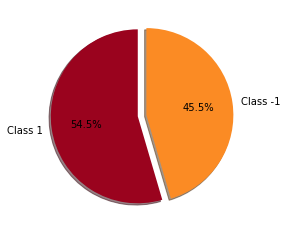

Binarized Neural Network with only input layer 

The trained model : [1, 2, -3, 4, -5, -6, 7, 8, -9, 10, -11, 12, -13, 14, -15, -16, 17, -18, -19, 20, -21, -22, -23, 24, -25, 26, 27]
This are the weights: [1, 2, -3, 4, -5] 
 

The accuracy on the training set is: 0.8181818181818182 
The number of error is 3 
 

The accuracy on the test set is: 0.8


In [ ]:
# 1 layer
final_results(2**5,5,'inner_product',0.3, 1)

Training: 
 X_train dimension= (22, 5) 
 y_train dimension=(22,)

Test: 
 X_test dimension= (10, 5) 
 y_test dimension=(10,)
 

Are the data balanced? 



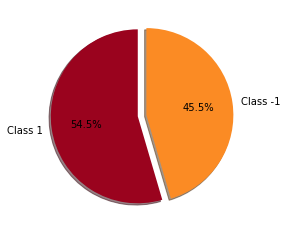

Binarized Neural Network with 1 hidden layers of dimension 5 

The trained model : [-1, -2, -3, 4, 5, -6, -7, 8, 9, 10, 11, -12, 13, 14, -15, 16, -17, 18, 19, 20, 21, 22, 23, 24, -25, -26, 27, 28, -29, -30, -31, -32, -33, -34, 35, -36, -37, -38, -39, 40, -41, 42, 43, 44, 45, -46, -47, -48, -49, 50, -51, -52, -53, -54, -55, -56, 57, -58, -59, -60, -61, 62, 63, 64, 65, 66, 67, -68, 69, 70, -71, -72, -73, -74, -75, 76, 77, 78, 79, 80, 81, 82, 83, 84, -85, 86, 87, 88, -89, -90, 91, -92, -93, 94, -95, 96, 97, -98, 99, 100, 101, 102, -103, -104, -105, 106, -107, -108, 109, -110, -111, 112, 113, 114, -115, 116, 117, -118, 119, -120, -121, 122, 123, 124, 125, -126, -127, -128, -129, 130, 131, 132, 133, 134, -135, -136, -137, -138, -139, -140, -141, -142, 143, -144, 145, 146, 147, -148, 149, -150, 151, 152, -153, -154, 155, -156, 157, -158, 159, -160, 161, 162]
This are the weights: [-1, -2, -3, 4, 5, -6, -7, 8, 9, 10, 11, -12, 13, 14, -15, 16, -17, 18, 19, 20, 21, 22, 23, 24, -25, -26, 27, 28,

In [ ]:
# 2 layer
final_results(2**5,5,'inner_product',0.3, 2, 5)

### Random function

Training: 
 X_train dimension= (22, 5) 
 y_train dimension=(22,)

Test: 
 X_test dimension= (10, 5) 
 y_test dimension=(10,)
 

Are the data balanced? 



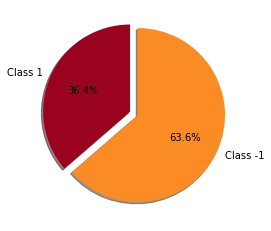

Binarized Neural Network with only input layer 

The trained model : [1, -2, -3, -4, 5, -6, 7, -8, -9, -10, -11, -12, -13, -14, 15, -16, -17, 18, -19, -20, 21, 22, 23, -24, -25, 26, 27]
This are the weights: [1, -2, -3, -4, 5] 
 

The accuracy on the training set is: 0.7272727272727273 
The number of error is 6 
 

The accuracy on the test set is: 0.6


In [ ]:
# 1 layer
final_results(2**5,5,'random',0.3, 1)

Training: 
 X_train dimension= (22, 5) 
 y_train dimension=(22,)

Test: 
 X_test dimension= (10, 5) 
 y_test dimension=(10,)
 

Are the data balanced? 



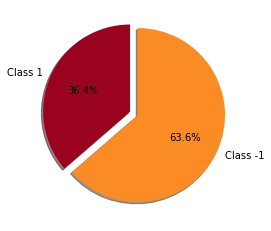

Binarized Neural Network with 1 hidden layers of dimension 5 

The trained model : [1, -2, -3, -4, 5, 6, -7, 8, 9, -10, 11, 12, 13, -14, -15, -16, -17, -18, -19, 20, 21, 22, -23, -24, -25, 26, 27, -28, -29, 30, -31, -32, 33, -34, 35, 36, -37, 38, -39, 40, -41, 42, 43, -44, -45, -46, -47, 48, -49, 50, -51, -52, 53, 54, 55, -56, -57, 58, 59, -60, -61, 62, 63, -64, -65, -66, -67, -68, -69, -70, -71, -72, 73, 74, 75, 76, 77, -78, -79, -80, -81, 82, -83, 84, -85, -86, 87, -88, 89, -90, 91, -92, -93, 94, 95, -96, -97, -98, -99, -100, -101, -102, -103, 104, -105, 106, -107, -108, 109, 110, 111, 112, 113, 114, -115, 116, -117, -118, 119, -120, -121, 122, 123, -124, -125, -126, -127, 128, -129, 130, 131, 132, -133, 134, -135, 136, -137, 138, 139, 140, -141, 142, -143, -144, -145, -146, -147, -148, -149, 150, -151, -152, 153, -154, -155, 156, -157, -158, -159, -160, 161, -162]
This are the weights: [1, -2, -3, -4, 5, 6, -7, 8, 9, -10, 11, 12, 13, -14, -15, -16, -17, -18, -19, 20, 21, 22, -23, -2

In [ ]:
# 2 layer
final_results(2**5,5,'random',0.3, 2, 5)

## Test with dataset dimension n = max

### Majority function

Training: 
 X_train dimension= (44, 20) 
 y_train dimension=(44,)

Test: 
 X_test dimension= (20, 20) 
 y_test dimension=(20,)
 

Are the data balanced? 



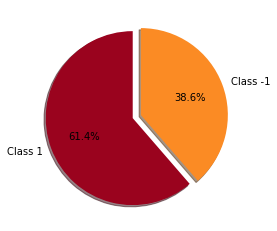

Binarized Neural Network with only input layer 

The trained model : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, -23, 24, 25, 26, -27, -28, -29, 30, 31, -32, 33, -34, -35, 36, 37, 38, -39, 40, 41, -42, 43, 44, -45, 46, 47, -48, 49, 50, -51, 52, -53, 54, 55, 56, 57, -58, 59, -60, -61, 62, 63, -64]
This are the weights: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] 
 

The accuracy on the training set is: 1.0 
The number of error is 0 
 

The accuracy on the test set is: 1.0


In [ ]:
# 1 layer
final_results(2**6,20,'majority',0.3, 1)

Training: 
 X_train dimension= (89, 15) 
 y_train dimension=(89,)

Test: 
 X_test dimension= (39, 15) 
 y_test dimension=(39,)
 

Are the data balanced? 



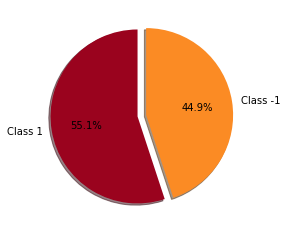

Binarized Neural Network with 1 hidden layers of dimension 10 

The trained model : [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, 17, 18, -19, 20, 21, 22, 23, 24, -25, -26, 27, -28, -29, 30, 31, 32, 33, 34, 35, -36, -37, -38, -39, 40, 41, 42, 43, 44, -45, 46, 47, -48, 49, -50, 51, 52, 53, 54, 55, -56, -57, 58, -59, -60, -61, 62, -63, 64, 65, -66, 67, -68, -69, 70, -71, -72, 73, -74, -75, -76, -77, 78, -79, -80, -81, -82, -83, 84, -85, -86, -87, -88, -89, -90, 91, 92, -93, 94, 95, -96, 97, -98, -99, -100, -101, 102, 103, -104, 105, -106, 107, 108, 109, 110, 111, 112, 113, 114, 115, -116, -117, 118, 119, 120, -121, 122, -123, 124, 125, -126, -127, -128, 129, 130, -131, -132, -133, 134, 135, -136, -137, -138, 139, 140, 141, -142, -143, 144, -145, -146, -147, -148, -149, -150, -151, 152, 153, 154, -155, -156, 157, 158, -159, 160, -161, 162, 163, -164, -165, -166, 167, 168, -169, -170, 171, 172, -173, -174, 175, 176, 177, -178, -179, -180, -181, 182, -183, 184, -18

In [ ]:
# 2 layer
final_results(2**7,15,'majority',0.3, 2, 10)

### XOR function

Training: 
 X_train dimension= (44, 20) 
 y_train dimension=(44,)

Test: 
 X_test dimension= (20, 20) 
 y_test dimension=(20,)
 

Are the data balanced? 



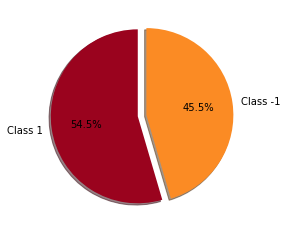

Binarized Neural Network with only input layer 

The trained model : [-1, 2, -3, 4, -5, 6, 7, 8, -9, 10, -11, 12, -13, 14, -15, 16, 17, 18, -19, -20, 21, 22, 23, 24, -25, 26, -27, 28, 29, -30, -31, -32, -33, 34, 35, -36, 37, 38, -39, 40, 41, -42, -43, 44, -45, 46, 47, 48, -49, -50, 51, 52, 53, 54, -55, -56, -57, 58, 59, -60, 61, -62, 63, -64]
This are the weights: [-1, 2, -3, 4, -5, 6, 7, 8, -9, 10, -11, 12, -13, 14, -15, 16, 17, 18, -19, -20] 
 

The accuracy on the training set is: 0.8863636363636364 
The number of error is 5 
 

The accuracy on the test set is: 0.65


In [ ]:
# 1 layer
final_results(2**6,20,'XOR',0.3, 1)

Training: 
 X_train dimension= (89, 15) 
 y_train dimension=(89,)

Test: 
 X_test dimension= (39, 15) 
 y_test dimension=(39,)
 

Are the data balanced? 



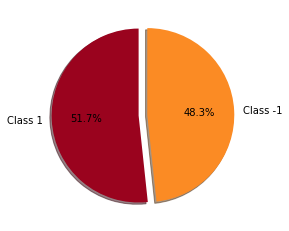

Binarized Neural Network with 1 hidden layers of dimension 10 

The trained model : [-1, -2, -3, 4, -5, 6, -7, 8, -9, -10, 11, 12, -13, -14, 15, -16, 17, -18, -19, -20, 21, -22, -23, -24, 25, -26, 27, -28, -29, -30, 31, -32, -33, 34, -35, -36, -37, 38, -39, -40, -41, -42, 43, 44, -45, -46, -47, 48, -49, 50, -51, -52, -53, -54, 55, -56, -57, -58, -59, -60, 61, -62, 63, 64, -65, 66, 67, -68, -69, 70, 71, -72, 73, -74, -75, -76, -77, -78, 79, 80, 81, -82, 83, -84, -85, 86, -87, -88, 89, -90, 91, 92, -93, 94, 95, 96, -97, 98, -99, -100, -101, 102, 103, 104, 105, -106, 107, 108, -109, -110, -111, -112, 113, 114, 115, -116, 117, 118, 119, -120, -121, 122, -123, -124, -125, 126, -127, 128, -129, -130, 131, 132, -133, 134, 135, -136, 137, -138, -139, 140, 141, 142, -143, -144, -145, -146, 147, 148, -149, 150, 151, 152, -153, -154, 155, 156, 157, 158, -159, -160, 161, 162, -163, -164, 165, -166, 167, 168, 169, 170, -171, 172, -173, 174, -175, -176, -177, 178, 179, 180, -181, -182, 183, 184, 185

In [ ]:
# 2 layer
final_results(2**7,15,'XOR',0.3, 2, 10)

### Parity function

Training: 
 X_train dimension= (44, 20) 
 y_train dimension=(44,)

Test: 
 X_test dimension= (20, 20) 
 y_test dimension=(20,)
 

Are the data balanced? 



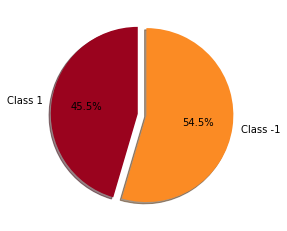

Binarized Neural Network with only input layer 

The trained model : [1, -2, -3, -4, -5, 6, -7, 8, 9, -10, 11, 12, -13, 14, 15, -16, -17, -18, 19, 20, -21, -22, 23, 24, 25, -26, 27, -28, -29, 30, 31, 32, 33, -34, 35, 36, -37, -38, 39, 40, 41, 42, 43, 44, 45, -46, -47, -48, 49, -50, 51, -52, -53, 54, 55, 56, 57, -58, -59, 60, 61, 62, -63, -64]
This are the weights: [1, -2, -3, -4, -5, 6, -7, 8, 9, -10, 11, 12, -13, 14, 15, -16, -17, -18, 19, 20] 
 

The accuracy on the training set is: 0.8636363636363636 
The number of error is 6 
 

The accuracy on the test set is: 0.45


In [ ]:
# 1 layer
final_results(2**6,20,'parity',0.3, 1)

Training: 
 X_train dimension= (89, 15) 
 y_train dimension=(89,)

Test: 
 X_test dimension= (39, 15) 
 y_test dimension=(39,)
 

Are the data balanced? 



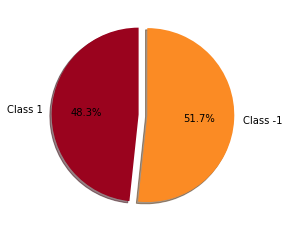

Binarized Neural Network with 1 hidden layers of dimension 10 

The trained model : [-1, 2, 3, 4, 5, 6, -7, -8, -9, -10, -11, 12, -13, 14, 15, 16, 17, -18, 19, 20, -21, -22, 23, -24, -25, -26, -27, -28, 29, -30, -31, -32, -33, 34, -35, -36, 37, -38, 39, 40, 41, -42, 43, 44, 45, -46, 47, -48, -49, 50, 51, 52, 53, 54, -55, -56, -57, -58, -59, 60, 61, -62, 63, 64, 65, 66, -67, 68, -69, -70, -71, -72, 73, 74, 75, 76, -77, -78, 79, 80, 81, -82, 83, 84, 85, 86, 87, 88, -89, -90, 91, -92, 93, 94, 95, 96, 97, 98, -99, 100, -101, 102, -103, -104, 105, 106, -107, 108, 109, 110, 111, -112, -113, -114, -115, 116, 117, -118, -119, 120, 121, -122, 123, 124, -125, 126, -127, -128, -129, -130, -131, 132, -133, 134, 135, -136, 137, 138, -139, -140, 141, -142, -143, 144, 145, 146, -147, -148, 149, 150, -151, -152, -153, 154, 155, -156, -157, -158, 159, -160, 161, -162, 163, -164, -165, -166, -167, 168, 169, 170, 171, -172, -173, 174, -175, -176, -177, -178, 179, -180, -181, -182, -183, -184, -185, 186, 

In [ ]:
# 2 layer
final_results(2**7,15,'parity',0.3, 2, 10)

### Inner product function

Training: 
 X_train dimension= (44, 20) 
 y_train dimension=(44,)

Test: 
 X_test dimension= (20, 20) 
 y_test dimension=(20,)
 

Are the data balanced? 



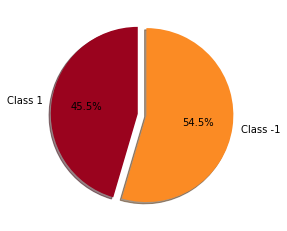

Binarized Neural Network with only input layer 

The trained model : [1, -2, -3, -4, -5, 6, -7, 8, 9, -10, 11, 12, -13, 14, 15, -16, -17, -18, 19, 20, -21, -22, 23, 24, 25, -26, 27, -28, -29, 30, 31, 32, 33, -34, 35, 36, -37, -38, 39, 40, 41, 42, 43, 44, 45, -46, -47, -48, 49, -50, 51, -52, -53, 54, 55, 56, 57, -58, -59, 60, 61, 62, -63, -64]
This are the weights: [1, -2, -3, -4, -5, 6, -7, 8, 9, -10, 11, 12, -13, 14, 15, -16, -17, -18, 19, 20] 
 

The accuracy on the training set is: 0.8636363636363636 
The number of error is 6 
 

The accuracy on the test set is: 0.45


In [ ]:
# 1 layer
final_results(2**6,20,'inner_product',0.3, 1)

Training: 
 X_train dimension= (89, 15) 
 y_train dimension=(89,)

Test: 
 X_test dimension= (39, 15) 
 y_test dimension=(39,)
 

Are the data balanced? 



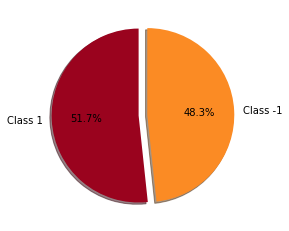

Binarized Neural Network with 1 hidden layers of dimension 10 

The trained model : [-1, -2, -3, 4, -5, 6, -7, 8, -9, -10, 11, 12, -13, -14, 15, -16, 17, -18, -19, -20, 21, -22, -23, -24, 25, -26, 27, -28, -29, -30, 31, -32, -33, 34, -35, -36, -37, 38, -39, -40, -41, -42, 43, 44, -45, -46, -47, 48, -49, 50, -51, -52, -53, -54, 55, -56, -57, -58, -59, -60, 61, -62, 63, 64, -65, 66, 67, -68, -69, 70, 71, -72, 73, -74, -75, -76, -77, -78, 79, 80, 81, -82, 83, -84, -85, 86, -87, -88, 89, -90, 91, 92, -93, 94, 95, 96, -97, 98, -99, -100, -101, 102, 103, 104, 105, -106, 107, 108, -109, -110, -111, -112, 113, 114, 115, -116, 117, 118, 119, -120, -121, 122, -123, -124, -125, 126, -127, 128, -129, -130, 131, 132, -133, 134, 135, -136, 137, -138, -139, 140, 141, 142, -143, -144, -145, -146, 147, 148, -149, 150, 151, 152, -153, -154, 155, 156, 157, 158, -159, -160, 161, 162, -163, -164, 165, -166, 167, 168, 169, 170, -171, 172, -173, 174, -175, -176, -177, 178, 179, 180, -181, -182, 183, 184, 185

In [ ]:
# 2 layer
final_results(2**7,15,'inner_product',0.3, 2, 10)

### Random function

Training: 
 X_train dimension= (44, 20) 
 y_train dimension=(44,)

Test: 
 X_test dimension= (20, 20) 
 y_test dimension=(20,)
 

Are the data balanced? 



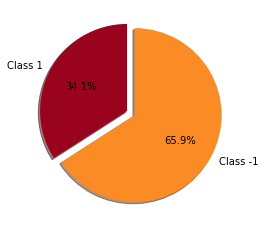

Binarized Neural Network with only input layer 

The trained model : [-1, 2, 3, -4, -5, 6, 7, -8, -9, 10, 11, 12, -13, 14, -15, -16, 17, 18, -19, 20, 21, 22, -23, -24, 25, 26, -27, -28, -29, -30, -31, -32, -33, -34, -35, 36, -37, -38, -39, 40, 41, -42, -43, -44, -45, 46, 47, 48, -49, 50, -51, 52, -53, -54, -55, 56, -57, 58, 59, -60, -61, 62, 63, -64]
This are the weights: [-1, 2, 3, -4, -5, 6, 7, -8, -9, 10, 11, 12, -13, 14, -15, -16, 17, 18, -19, 20] 
 

The accuracy on the training set is: 0.8181818181818182 
The number of error is 7 
 

The accuracy on the test set is: 0.25


In [ ]:
# 1 layer
final_results(2**6,20,'random',0.3, 1)

Training: 
 X_train dimension= (89, 15) 
 y_train dimension=(89,)

Test: 
 X_test dimension= (39, 15) 
 y_test dimension=(39,)
 

Are the data balanced? 



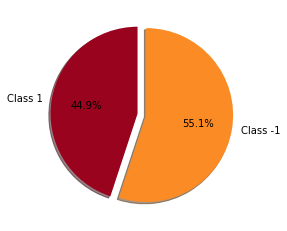

Binarized Neural Network with 1 hidden layers of dimension 10 



In [ ]:
# 2 layer
final_results(2**7,15,'random',0.3, 2, 10)